<a href="https://colab.research.google.com/github/MohiniSarwade/NLP/blob/master/TextDocumentSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Including tensorflow and tensorflow_hub opensource python libraries

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from absl import logging
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Inlcuding the google's universal sentence encoder


In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
embed = hub.load(module_url)

Reading the document1 from local machine.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving doc1.txt to doc1 (1).txt


Reading document2 from local machine

In [ ]:
uploaded1 = files.upload()

Saving doc2.txt to doc2 (1).txt


Uploading documents

In [ ]:
messages=[uploaded['doc1.txt'],uploaded1['doc2.txt']]

In [ ]:
similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)

Finding embeddings of the documnets and similarity between them using inner product of them in the form of corelation matrix

In [ ]:
import numpy as np
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    message_embeddings_ = session.run(similarity_message_encodings, feed_dict={similarity_input_placeholder: messages})

    for i, sm in enumerate(np.array(message_embeddings_).tolist()):
      sm_snippet = ", ".join((str(x) for x in sm[:3]))
      print("Embedding: [{}, ...]\n".format(sm_snippet))

    
    corr = np.inner(message_embeddings_, message_embeddings_)
    print(corr)
    print("\nSimilarity Index =",round(float(corr[0][1]*100)),"%")

Embedding: [-0.042330484837293625, -0.0626017153263092, -0.028251146897673607, ...]

Embedding: [-0.025469176471233368, -0.051968131214380264, 0.05520530417561531, ...]

[[1.         0.39177483]
 [0.39177483 0.9999999 ]]

Similarity Index = 39 %


Plotting the similarity values in a heatmap

In [ ]:
import matplotlib.pyplot as plt
def heatmap(values):
    fig, ax = plt.subplots()
    im = ax.imshow(values)
    x_labels=['Doc1','Doc2']
    y_labels=['Doc1','Doc2']
    # showing all ticks...
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_yticks(np.arange(len(y_labels)))
    #labeling them with the respective list entries
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10,
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(y_labels)):
        for j in range(len(x_labels)):
            text = ax.text(j, i, "%.2f"%values[i, j],
                           ha="center", va="center", color="w", 
fontsize=20)

    fig.tight_layout()
    plt.show()

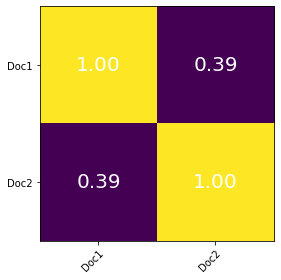

In [ ]:
heatmap(corr)